# **DEMO**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tqdm import tqdm
import codedapertures as ca
import scipy as sp
import os
import cv2

from scipy.ndimage.filters import convolve
import time
import pickle

from utils import get_objects_from_config
from experiment import CodApSimulator, play_simulation, plot_results
from image_preprocessing import process_image
from decoding_algorythms import get_mura_decoding_pattern

## 1. Juli's and George's experiment

One of our first objectives was to simulate numerically what our peers Juli and George were doing experimentally, that is, testing the results seen on a screen of iluminating masks with different shapes with sources also with different shapes.

- Descripción del experimento
- Descripción del uso de sus imágenes y de desición de variables
- !!! Cambiar Fotons a Photons !!!

#### 1.1) **Mask:** 'Carita Feliz' - **Source:** 'Lambda'

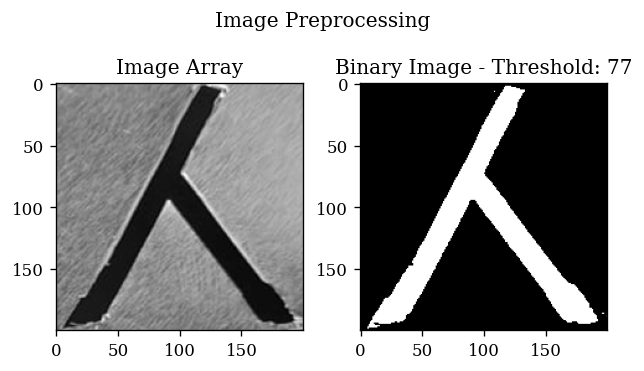

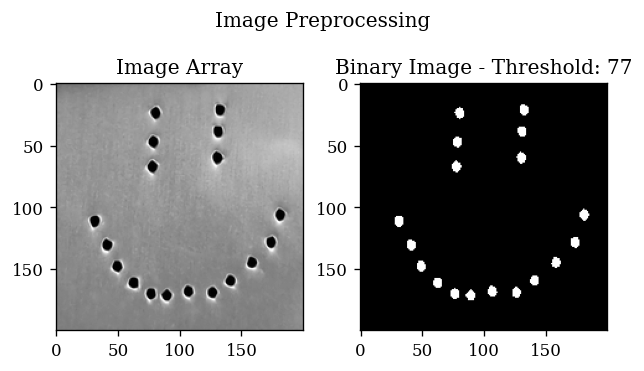

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george1


Process 16560:   0%|          | 53/50000 [00:00<01:35, 520.65it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16560: 100%|██████████| 50000/50000 [01:35<00:00, 524.67it/s]

Adding noise to the image...
Done!
Saving results...


In [2]:
config_path = "exp_juli_george.json"
source, slit, sensor, options = get_objects_from_config(config_path)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
play_simulation(simulator=simulator, config_path=config_path)

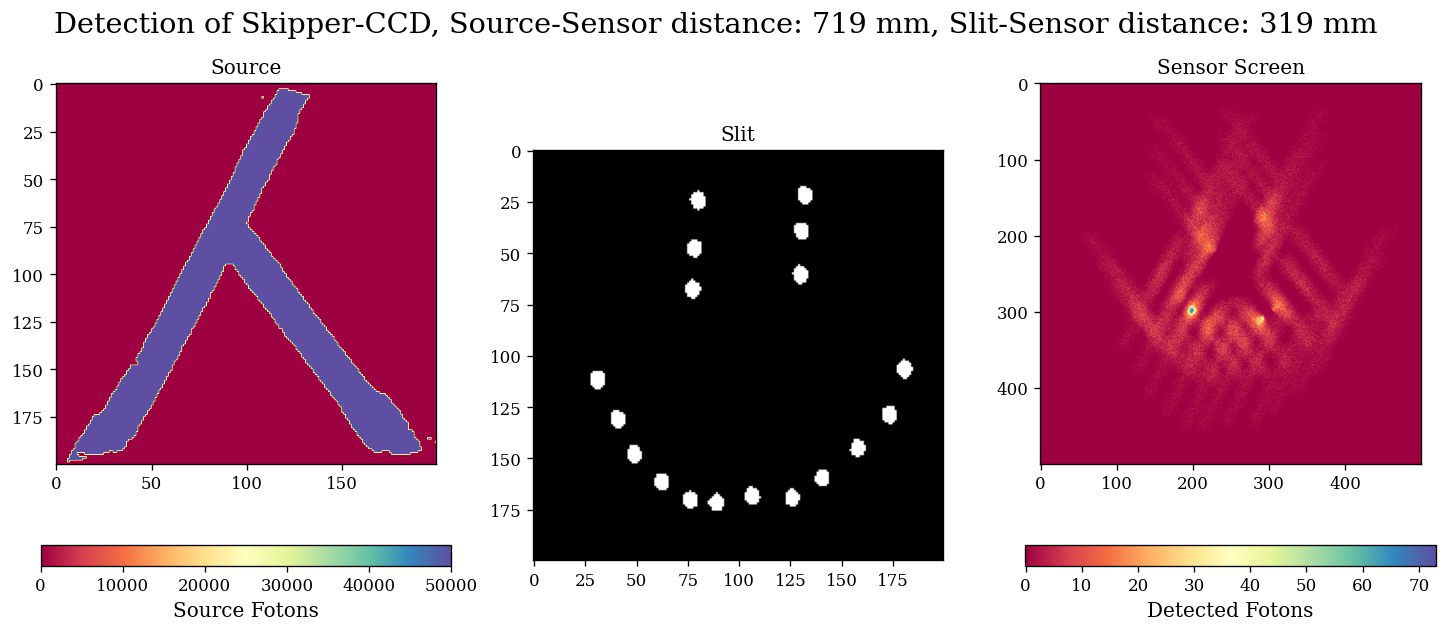

<Figure size 720x480 with 0 Axes>

In [3]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
axs[0].set_title("Source")
axs[0].grid(False)
fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
axs[1].set_title("Slit")
axs[1].grid(False)
im1 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
axs[2].set_title("Sensor Screen")
axs[2].grid(False)
fig.colorbar(im1, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
plt.show()
plt.savefig(os.path.join(simulator.saving_dir, "exp_juli_george.png"))

#### 1.2) **Mask:** 'Lambda' - **Source:** 'Lambda'

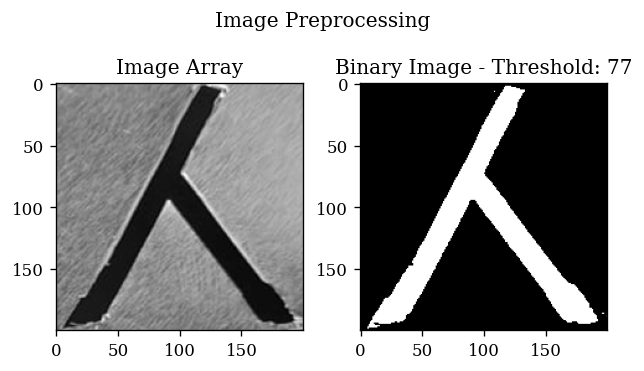

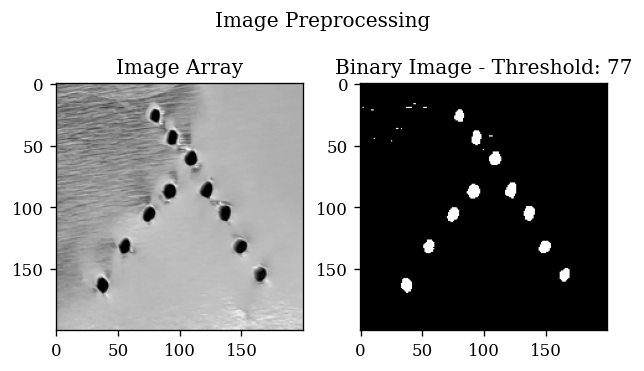

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george2


Process 16560:   0%|          | 44/50000 [00:00<01:54, 436.54it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 16560: 100%|██████████| 50000/50000 [01:41<00:00, 493.35it/s]

Adding noise to the image...
Done!
Saving results...


In [4]:
config_path = "exp_juli_george.json"
source, slit, sensor, options = get_objects_from_config(config_path)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
play_simulation(simulator=simulator, config_path=config_path)

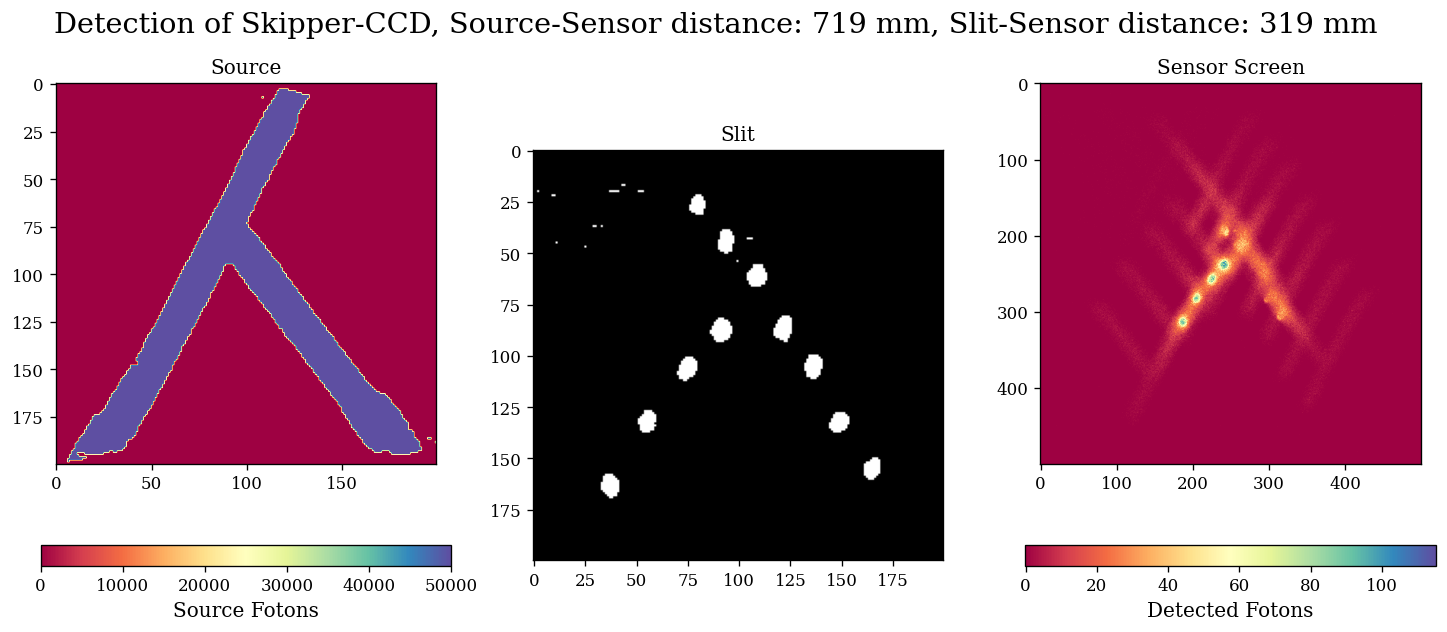

<Figure size 720x480 with 0 Axes>

In [5]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
axs[0].set_title("Source")
axs[0].grid(False)
fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
axs[1].set_title("Slit")
axs[1].grid(False)
im1 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
axs[2].set_title("Sensor Screen")
axs[2].grid(False)
fig.colorbar(im1, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
plt.show()
plt.savefig(os.path.join(simulator.saving_dir, "exp_juli_george.png"))

#### 1.3) **Mask:** 'Pinhole' - **Source:** 'Lambda'

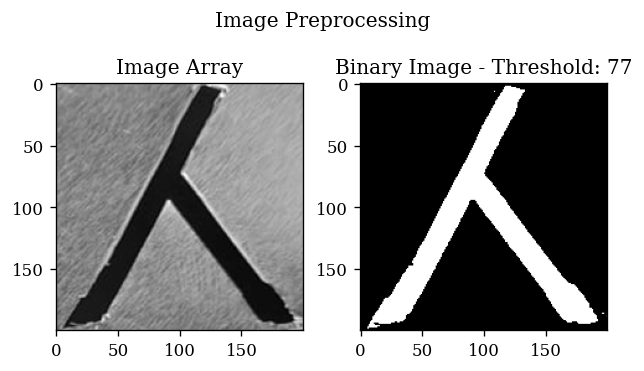

The chosen directory is not empty:
results\exp_juli_george\exp_juli_george3


Process 15600:   0%|          | 46/50000 [00:00<01:49, 457.34it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 15600: 100%|██████████| 50000/50000 [01:30<00:00, 551.22it/s]

Adding noise to the image...
Done!
Saving results...


In [3]:
config_path = "exp_juli_george.json"
source, slit, sensor, options = get_objects_from_config(config_path)
simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
play_simulation(simulator=simulator, config_path=config_path)

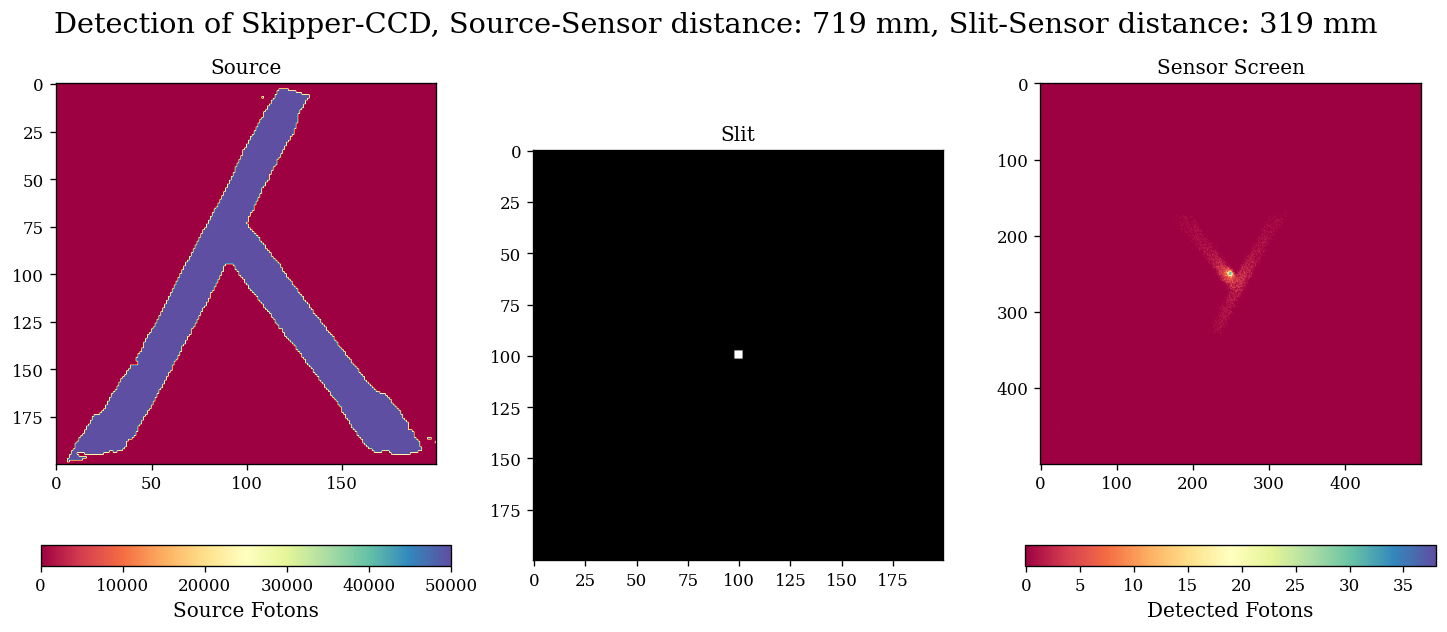

<Figure size 720x480 with 0 Axes>

In [4]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
plt.suptitle(f'Detection of Skipper-CCD, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
axs[0].set_title("Source")
axs[0].grid(False)
fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
axs[1].set_title("Slit")
axs[1].grid(False)
im1 = axs[2].imshow(simulator.sensor.screen, cmap = "Spectral")
axs[2].set_title("Sensor Screen")
axs[2].grid(False)
fig.colorbar(im1, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
plt.show()
plt.savefig(os.path.join(simulator.saving_dir, "exp_juli_george.png"))

## 2. Skipper Characterization

* Details of read out noise and dark current

#### 2.1) Studing the results detecting different images passing through pinhole with a Perfect Detector - Skipper CCD - Normal CCD 

In [2]:
def compare_exps(config_paths, plot_hist = False):
    sensors = []

    for config in config_paths:
        source, slit, sensor, options = get_objects_from_config(config)
        simulator = CodApSimulator(options=options, source=source, slit=slit, sensor=sensor)
        play_simulation(simulator=simulator, config_path=config)
        sensors.append(simulator.sensor)

    #Graph source vs slit (Experiment State)
    fig, axs = plt.subplots(ncols = 2, figsize = (10,6))
    plt.suptitle(f'Experiment State, Source-Sensor distance: {simulator.options.source_to_sensor_distance} mm, Slit-Sensor distance: 319 mm', fontsize = 'xx-large')
    im0 = axs[0].imshow(simulator.source.screen, cmap = "Spectral")
    axs[0].set_title("Source")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Source Photons', orientation = 'horizontal')
    axs[1].imshow(simulator.slit.mask, cmap = "binary_r")
    axs[1].set_title("Slit")
    axs[1].grid(False)
    plt.show()

    #Graph 3 results
    fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
    plt.suptitle(f'Detection of a same experiment by different sensors', fontsize = 'xx-large')
    im0 = axs[0].imshow(sensors[0].screen, cmap = "Spectral")
    axs[0].set_title("Perfect CCD")
    axs[0].grid(False)
    fig.colorbar(im0, ax=axs[0], label = 'Detected Photons', orientation = 'horizontal')
    im1 = axs[1].imshow(sensors[1].screen, cmap = "Spectral")
    axs[1].set_title("Skipper CCD")
    axs[1].grid(False)
    fig.colorbar(im1, ax=axs[1], label = 'Detected Photons', orientation = 'horizontal')
    im2 = axs[2].imshow(sensors[2].screen, cmap = "Spectral")
    axs[2].set_title("Normal CCD")
    axs[2].grid(False)
    fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
    plt.show()

    #if plot_hist == True:

    return source, slit, options, sensors        

Experiment 1:
- **Source:** *Grid*
- **Slit:** *Pinhole*

In [3]:
config_paths = ["characterization_perfect.json", "characterization_skipper.json", "characterization_ccd.json"]

The chosen directory is not empty:
results\characterization_perfect\characterization


Process 13728:   0%|          | 196/50000 [00:00<00:25, 1946.56it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 13728: 100%|██████████| 50000/50000 [00:19<00:00, 2510.84it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_skipper\characterization


Process 13728:   1%|          | 503/50000 [00:00<00:20, 2444.34it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 13728: 100%|██████████| 50000/50000 [00:19<00:00, 2547.97it/s]


Adding noise to the image...
Done!
Saving results...
The chosen directory is not empty:
results\characterization_ccd\characterization


Process 13728:   0%|          | 215/50000 [00:00<00:23, 2133.72it/s]

Continuing...
Simulating the propagation of photons through the slit...


Process 13728: 100%|██████████| 50000/50000 [00:20<00:00, 2447.16it/s]


Adding noise to the image...
Done!
Saving results...


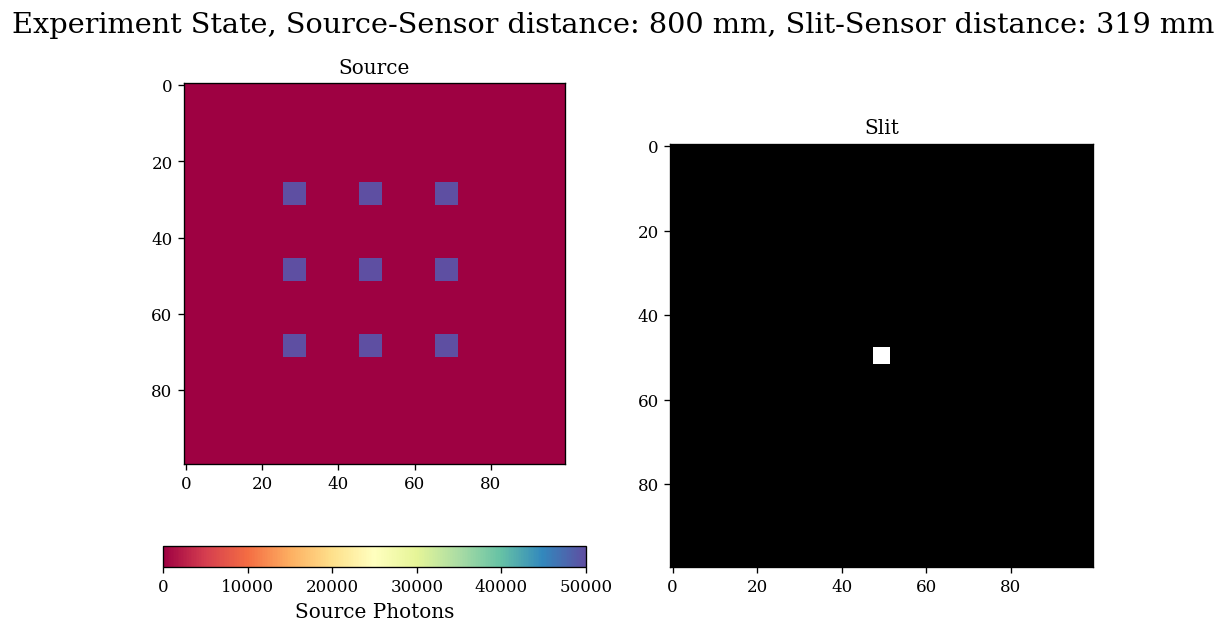

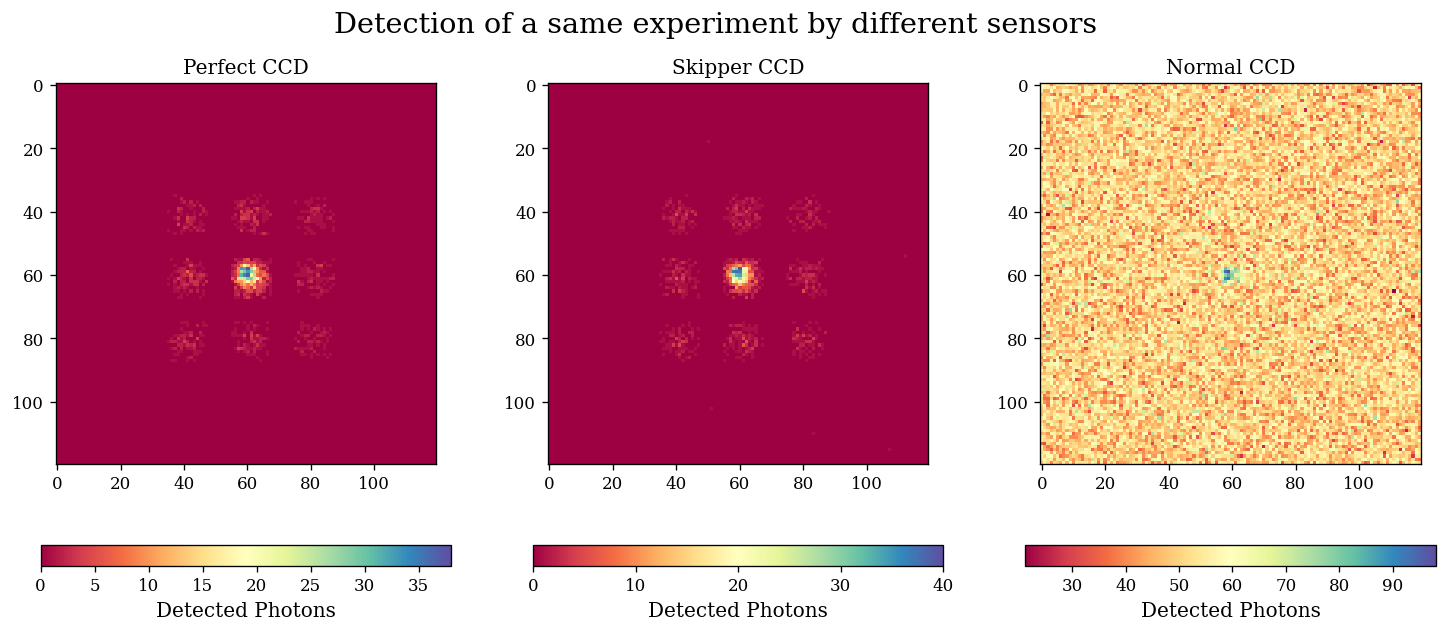

In [5]:
compare_exps(config_paths)

Experiment 2:
- **Source:** *Lambda*
- **Slit:** *Pinhole*

Process 10508:   0%|          | 0/50000 [00:00<?, ?it/s]

Process 10508:   0%|          | 70/50000 [00:00<01:11, 693.62it/s]

Simulating the propagation of photons through the slit...


Process 10508:   0%|          | 72/50000 [00:00<01:09, 715.15it/s]

Adding noise to the image...
Done!
Saving results...
Simulating the propagation of photons through the slit...


Process 10508:   0%|          | 78/50000 [00:00<01:04, 773.28it/s]

Adding noise to the image...
Done!
Saving results...
Simulating the propagation of photons through the slit...


Process 10508: 100%|██████████| 50000/50000 [00:59<00:00, 839.38it/s]


Adding noise to the image...
Done!
Saving results...


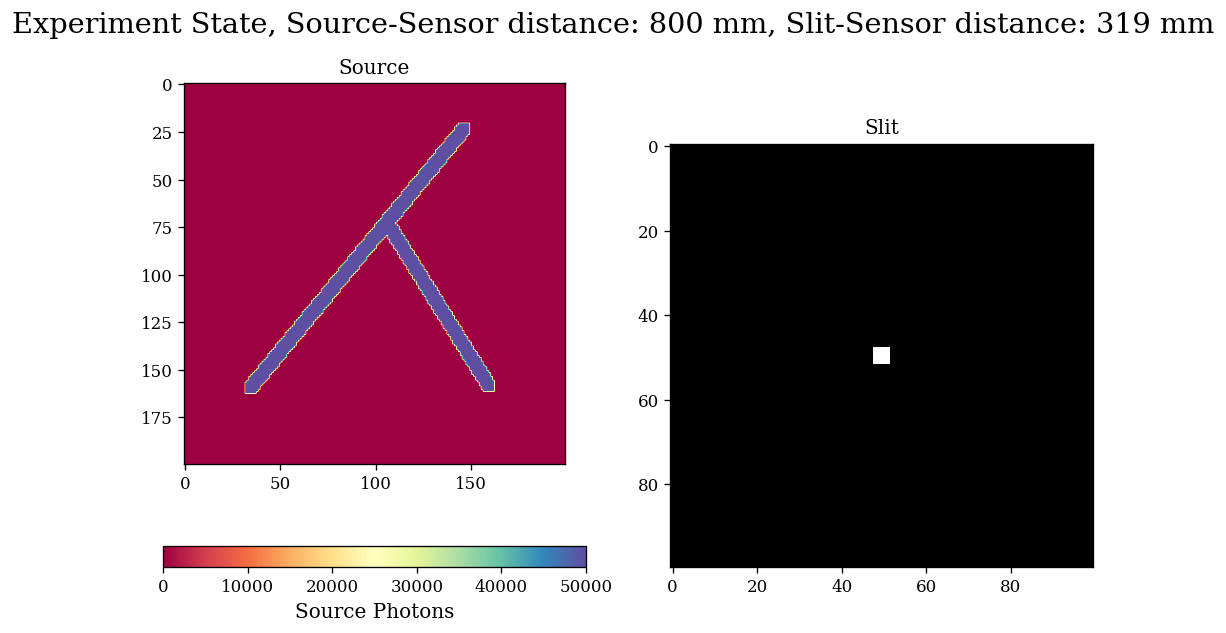

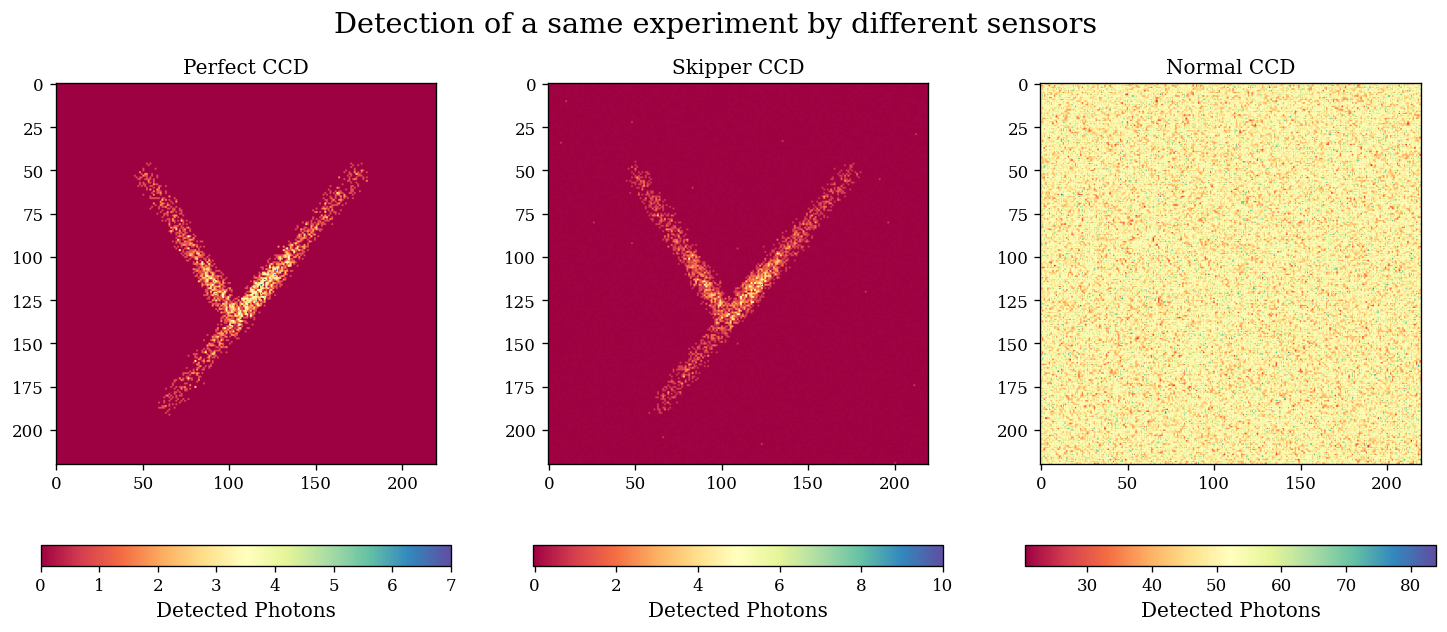

In [4]:
compare_exps(config_paths)

Experiment 3:
- **Source:** *Grid*
- **Slit:** *Phi*

Process 3416:   0%|          | 0/50000 [00:00<?, ?it/s]

Process 3416:   0%|          | 176/50000 [00:00<00:28, 1743.38it/s]

Simulating the propagation of photons through the slit...


Process 3416:   0%|          | 163/50000 [00:00<00:30, 1625.60it/s]

Adding noise to the image...
Done!
Saving results...
Simulating the propagation of photons through the slit...


Process 3416:   0%|          | 206/50000 [00:00<00:26, 1894.37it/s]

Adding noise to the image...
Done!
Saving results...
Simulating the propagation of photons through the slit...


Process 3416: 100%|██████████| 50000/50000 [00:31<00:00, 1591.28it/s]


Adding noise to the image...
Done!
Saving results...


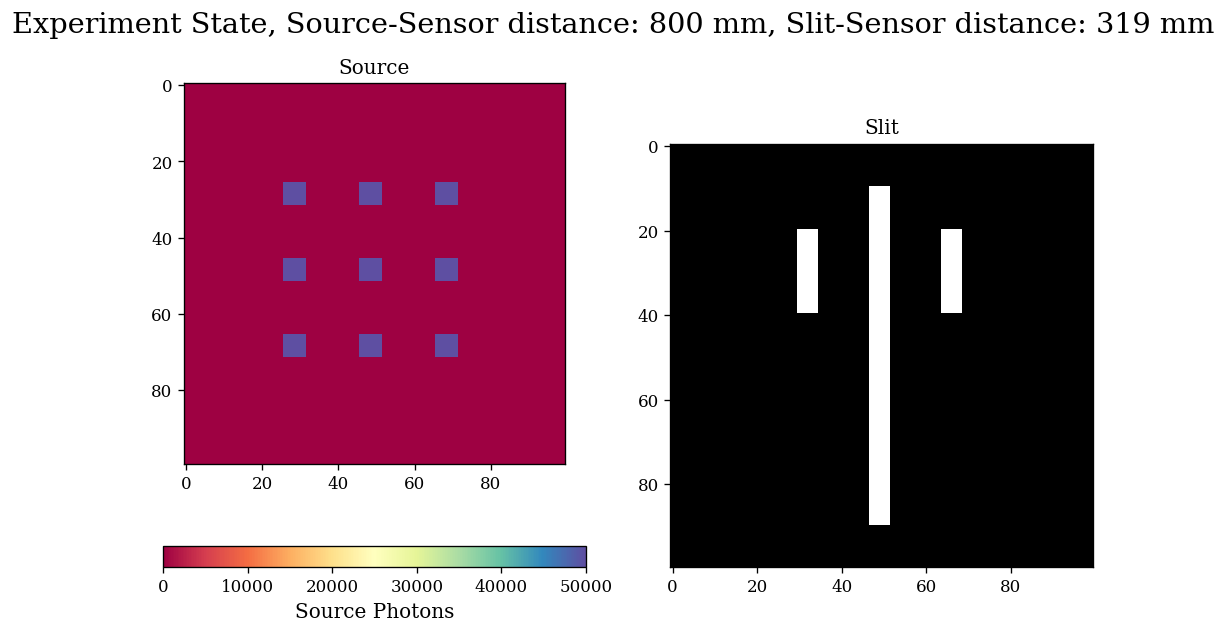

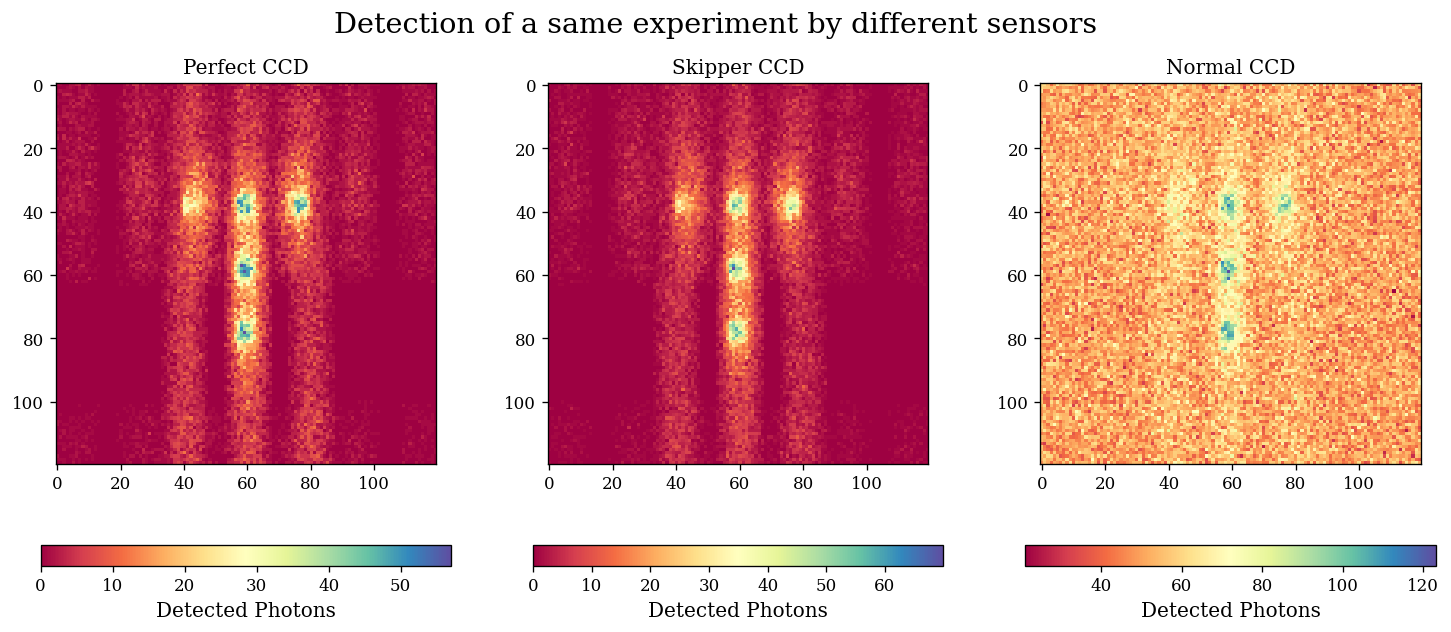

In [4]:
source, slit, options, sensors = compare_exps(config_paths)

In [ ]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,6))
plt.suptitle(f'Detection of a same experiment by different sensors', fontsize = 'xx-large')
im0 = axs[0].imshow(sensors[0].screen, cmap = "Spectral")
axs[0].set_title("Perfect CCD")
axs[0].grid(False)
fig.colorbar(im0, ax=axs[0], label = 'Detected Photons', orientation = 'horizontal')
im1 = axs[1].imshow(sensors[1].screen, cmap = "Spectral")
axs[1].set_title("Skipper CCD")
axs[1].grid(False)
fig.colorbar(im1, ax=axs[1], label = 'Detected Photons', orientation = 'horizontal')
im2 = axs[2].imshow(sensors[2].screen, cmap = "Spectral")
axs[2].set_title("Normal CCD")
axs[2].grid(False)
fig.colorbar(im2, ax=axs[2], label = 'Detected Photons', orientation = 'horizontal')
plt.show()

Experiment 4:
- **Source:** *Frame*
- **Slit:** *Phi*

In [ ]:
source, slit, options, sensors = compare_exps(config_paths)

## 3. Study of Decoding Algorithms